In [12]:
#Fatih Bayazıt 231404038
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Bitcoin verilerini çekme (Bitcoin'in piyasada olduğu dönemden itibaren)
btc_data = yf.download('BTC-USD', start='2009-01-01', end='2024-01-01')

[*********************100%%**********************]  1 of 1 completed


importlar ve veri çekme işlemi yapılır.

[*********************100%%**********************]  1 of 1 completed

Initial investment: $10000
Final portfolio value without commission: $924164.53
Final portfolio value with commission: $924162.53
Profit/Loss without commission: $914164.53
Profit/Loss with commission: $914162.53
Buy and Hold Annualized Return without commission: 62.81%
Buy and Hold Annualized Return with commission: 62.81%


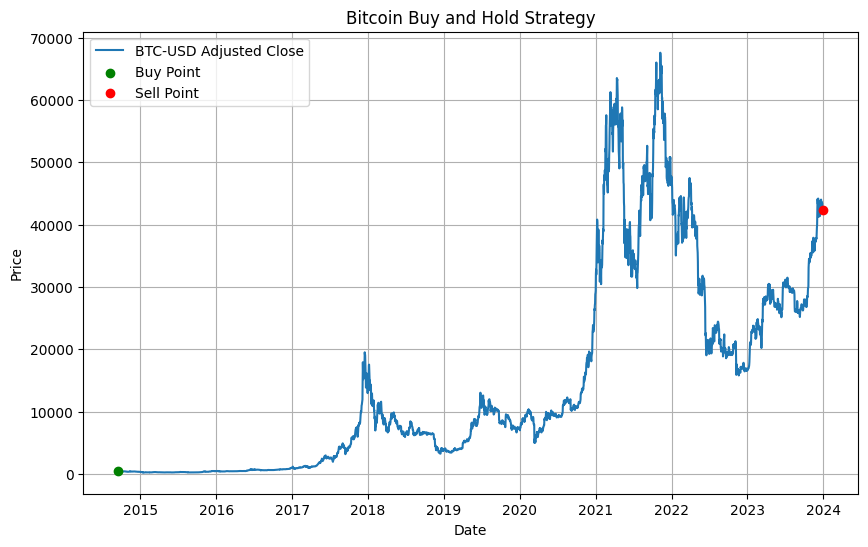

In [13]:
#1. Strategy: Buy and Hold
# Bitcoin verilerini çekme
btc_data = yf.download('BTC-USD', start='2009-01-01', end='2024-01-01')

# Buy and Hold stratejisi
initial_investment = 10000
buy_price = btc_data['Adj Close'].iloc[0]
btc_held = initial_investment / buy_price
sell_price = btc_data['Adj Close'].iloc[-1]
final_portfolio_value = btc_held * sell_price

# Komisyon hesaplama (Alım ve satım için toplam $2 komisyon)
commission = 2  # Alım ve satım için toplam komisyon
final_portfolio_value_commission = final_portfolio_value - commission

print(f"Initial investment: ${initial_investment}")
print(f"Final portfolio value without commission: ${final_portfolio_value:.2f}")
print(f"Final portfolio value with commission: ${final_portfolio_value_commission:.2f}")
print(f"Profit/Loss without commission: ${final_portfolio_value - initial_investment:.2f}")
print(f"Profit/Loss with commission: ${final_portfolio_value_commission - initial_investment:.2f}")

# Buy and Hold Stratejisi için Yıllık Getiri
investment_duration_years = (btc_data.index[-1] - btc_data.index[0]).days / 365.25
annualized_return_bh = ((final_portfolio_value / initial_investment) ** (1 / investment_duration_years)) - 1
annualized_return_bh_commission = ((final_portfolio_value_commission / initial_investment) ** (1 / investment_duration_years)) - 1

print(f"Buy and Hold Annualized Return without commission: {annualized_return_bh:.2%}")
print(f"Buy and Hold Annualized Return with commission: {annualized_return_bh_commission:.2%}")

# Buy and Hold Stratejisi Grafiği
plt.figure(figsize=(10, 6))
plt.plot(btc_data['Adj Close'], label='BTC-USD Adjusted Close')
plt.scatter(btc_data.index[0], buy_price, color='green', label='Buy Point', zorder=5)
plt.scatter(btc_data.index[-1], sell_price, color='red', label='Sell Point', zorder=5)
plt.title('Bitcoin Buy and Hold Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


Strateji 1: Buy and Hold
Bu en temel ve pasif yatırım stratejisi, başlangıçtaki yatırımı Bitcoin'e yatırıp, onu satmadan uzun bir süre boyunca elde tutmayı içerir. Bitcoin'in olağanüstü büyüme gösterdiği yıllarda bu strateji, yatırımcılara büyük getiriler sağlamıştır. Ancak, uzun vadeli tutma stratejisi, büyük fiyat dalgalanmalarına ve uzun süreli piyasa düşüşlerine de maruz kalabilir. Yatırımın başlangıç ve bitiş fiyatı arasındaki fark, stratejinin başarısını ve yatırımcının karını veya zararını belirler.

[*********************100%%**********************]  1 of 1 completed


Komisyonsuz:
Yıllık Getiri: -17.90%
Ortalama İşlem Sayısı (Yıllık): 112
Ortalama İşlem Karı: $-4566.93
Maksimum Kar: $3751.62
Maksimum Zarar: $-8408.96
Portföy Maksimum Değeri: $1600.65
Portföy Minimum Değeri: $1600.65


Komisyonlu:
Yıllık Getiri: -18.46%
Ortalama İşlem Sayısı (Yıllık): 112
Ortalama İşlem Karı: $-4631.76
Maksimum Kar: $3738.01
Maksimum Zarar: $-8505.41
Portföy Maksimum Değeri: $1502.62
Portföy Minimum Değeri: $1502.62


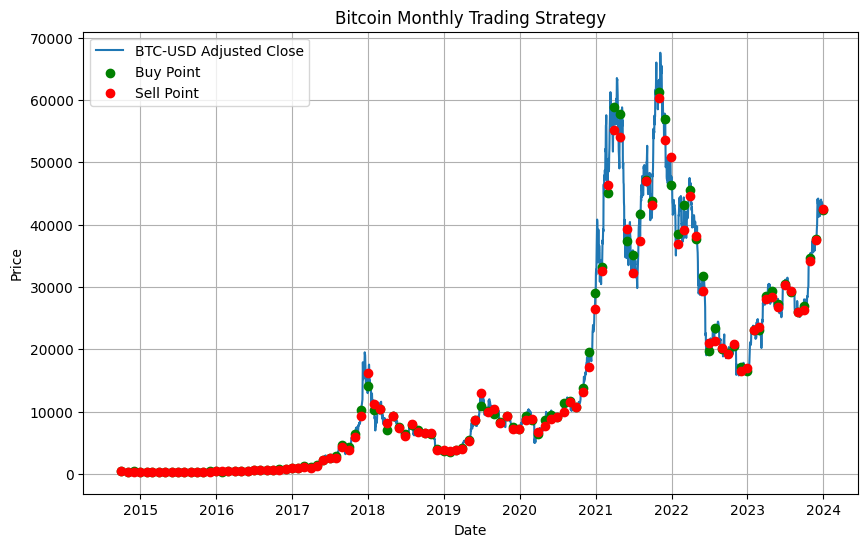

In [14]:
#2. Strategy: Monthly Trading

# Veri çekme
btc_data = yf.download('BTC-USD', start='2009-01-01', end='2024-01-01')

# Ay sonu ve ayın 25'inden sonra ilk işlem günü belirleme
btc_data['Month'] = btc_data.index.month
btc_data['EndOfMonth'] = btc_data['Month'].shift(-1) != btc_data['Month']
btc_data['After25'] = btc_data.index.day > 25

# Alım fiyatlarının belirlenmesi
buy_prices = btc_data[btc_data['EndOfMonth']]['Adj Close']

# Satım fiyatlarının belirlenmesi
sell_prices = []
for i in range(len(buy_prices)):
    month = buy_prices.index[i].month
    year = buy_prices.index[i].year
    after_25 = btc_data[(btc_data['After25']) & (btc_data.index.year == year) & (btc_data.index.month == month)]
    if not after_25.empty:
        sell_price = after_25.iloc[0]['Adj Close']
        sell_prices.append(sell_price)
    else:
        sell_prices.append(np.nan)

sell_prices = pd.Series(sell_prices, index=buy_prices.index[:len(sell_prices)])

# Komisyon hesaplamaları
initial_investment = 10000
commission = 1  # Her işlem için komisyon

# Komisyonsuz hesaplamalar
portfolio_value_no_commission = initial_investment
profits_no_commission = []
for buy_price, sell_price in zip(buy_prices, sell_prices):
    if not np.isnan(sell_price):
        btc_bought_no_commission = portfolio_value_no_commission / buy_price
        portfolio_value_no_commission = btc_bought_no_commission * sell_price
        profit_no_commission = btc_bought_no_commission * sell_price - initial_investment
        profits_no_commission.append(profit_no_commission)

# Komisyonlu hesaplamalar
portfolio_value_with_commission = initial_investment
profits_with_commission = []
for buy_price, sell_price in zip(buy_prices, sell_prices):
    if not np.isnan(sell_price):
        btc_bought_with_commission = (portfolio_value_with_commission - commission) / buy_price
        portfolio_value_with_commission = btc_bought_with_commission * sell_price - commission
        profit_with_commission = btc_bought_with_commission * sell_price - initial_investment - 2 * commission
        profits_with_commission.append(profit_with_commission)

# Yatırım süresini yıllık olarak hesaplama ve yıllık getiri hesaplamaları
investment_duration_years = (btc_data.index[-1] - btc_data.index[0]).days / 365.25
annualized_return_no_commission = ((portfolio_value_no_commission / initial_investment) ** (1 / investment_duration_years)) - 1
annualized_return_with_commission = ((portfolio_value_with_commission / initial_investment) ** (1 / investment_duration_years)) - 1

# Metriklerin hesaplanması
trade_count = len(profits_no_commission)
average_trade_profit_no_commission = np.mean(profits_no_commission)
average_trade_profit_with_commission = np.mean(profits_with_commission)
max_profit_no_commission = np.max(profits_no_commission)
max_loss_no_commission = np.min(profits_no_commission)
max_profit_with_commission = np.max(profits_with_commission)
max_loss_with_commission = np.min(profits_with_commission)
portfolio_max_no_commission = np.max(portfolio_value_no_commission)
portfolio_min_no_commission = np.min(portfolio_value_no_commission)
portfolio_max_with_commission = np.max(portfolio_value_with_commission)
portfolio_min_with_commission = np.min(portfolio_value_with_commission)

# Sonuçların yazdırılması
print("Komisyonsuz:")
print(f"Yıllık Getiri: {annualized_return_no_commission:.2%}")
print(f"Ortalama İşlem Sayısı (Yıllık): {trade_count}")
print(f"Ortalama İşlem Karı: ${average_trade_profit_no_commission:.2f}")
print(f"Maksimum Kar: ${max_profit_no_commission:.2f}")
print(f"Maksimum Zarar: ${max_loss_no_commission:.2f}")
print(f"Portföy Maksimum Değeri: ${portfolio_max_no_commission:.2f}")
print(f"Portföy Minimum Değeri: ${portfolio_min_no_commission:.2f}")
print("\n")
print("Komisyonlu:")
print(f"Yıllık Getiri: {annualized_return_with_commission:.2%}")
print(f"Ortalama İşlem Sayısı (Yıllık): {trade_count}")
print(f"Ortalama İşlem Karı: ${average_trade_profit_with_commission:.2f}")
print(f"Maksimum Kar: ${max_profit_with_commission:.2f}")
print(f"Maksimum Zarar: ${max_loss_with_commission:.2f}")
print(f"Portföy Maksimum Değeri: ${portfolio_max_with_commission:.2f}")
print(f"Portföy Minimum Değeri: ${portfolio_min_with_commission:.2f}")

# Grafiğin çizdirilmesi
plt.figure(figsize=(10, 6))
plt.plot(btc_data['Adj Close'], label='BTC-USD Adjusted Close')
plt.scatter(buy_prices.index, buy_prices, color='green', label='Buy Point', zorder=5)
plt.scatter(sell_prices.index, sell_prices, color='red', label='Sell Point', zorder=5)
plt.title('Bitcoin Monthly Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()



Strateji 2: Ay Sonu Alım Satımı
Bu strateji, ay sonu piyasa hareketlerinden yararlanmayı amaçlar. Ayın sonunda gerçekleşen alım işlemleri ve sonraki ayın başında yapılan satış işlemleri ile kısa vadeli getiri elde etmeye çalışır. Bu yaklaşım, yatırımcıların piyasa davranışlarındaki düzenli döngüleri tanımlamalarına ve bunlardan yararlanmalarına olanak tanır.

[*********************100%%**********************]  1 of 1 completed

Komisyonsuz:
Annualized Return: 13.29%
Average Trade Count: 1.0
Average Trade Profit: $2303.76
Average Trade Duration: 151.22222222222223 days
Max Profit: $22419.58
Max Loss: $-7049.39
Portfolio Max Value: $30733.81
Portfolio Min Value: $6789.88
Final Portfolio Value: $30733.81
Komisyonlu:
Annualized Return: 13.27%
Average Trade Count: 1.0
Average Trade Profit: $2298.27
Average Trade Duration: 151.22222222222223 days
Max Profit: $22385.09
Max Loss: $-7040.69
Portfolio Max Value: $30683.40
Portfolio Min Value: $6781.04
Final Portfolio Value: $30683.40


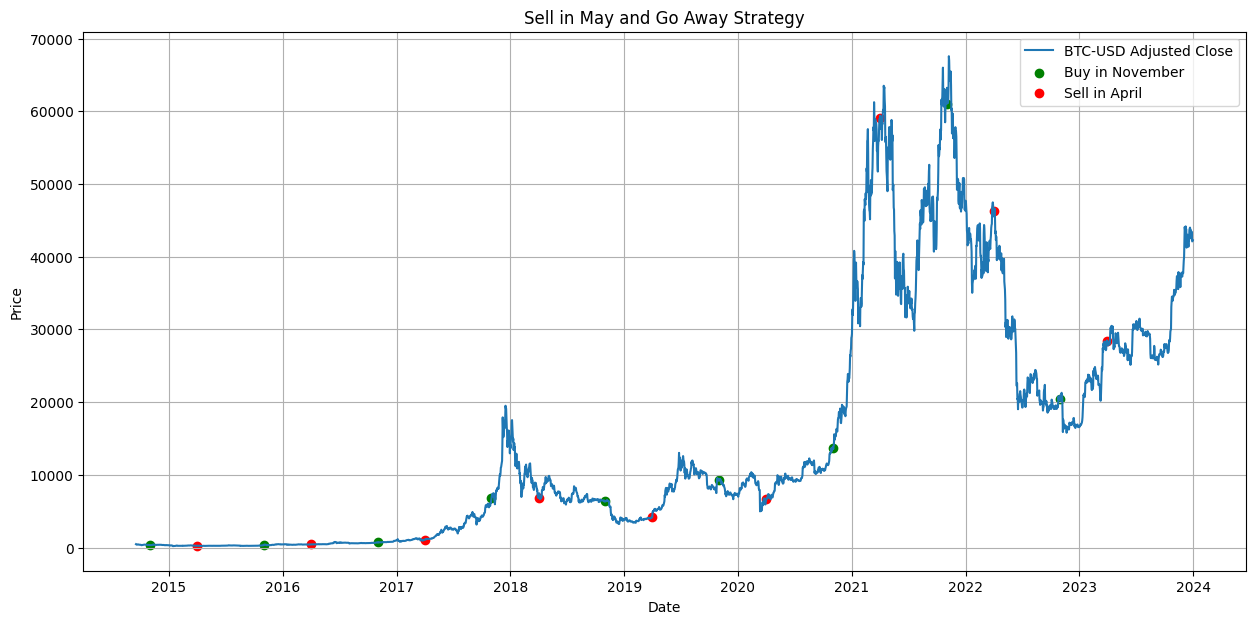

In [15]:
#3. Strategy: Sell in May and Go Away
# Veri çekme
btc_data = yf.download('BTC-USD', start='2005-01-01', end='2024-01-01')

initial_investment = 10000
commission = 1

# İşlem karları ve portföy değerleri
portfolio_values_no_commission = [initial_investment]
portfolio_values_with_commission = [initial_investment - commission]
trade_durations = []
buy_dates = []
sell_dates = []

# Yıllık işlem sayısı, işlem süreleri, kar ve zararlar
annual_trade_counts = []
profits_no_commission = []
profits_with_commission = []

for year in range(btc_data.index.year.min(), btc_data.index.year.max()):
    buy_data = btc_data[(btc_data.index.month == 11) & (btc_data.index.year == year)]
    sell_data = btc_data[(btc_data.index.month == 4) & (btc_data.index.year == year + 1)]

    if not buy_data.empty and not sell_data.empty:
        buy_price = buy_data.iloc[0]['Adj Close']
        sell_price = sell_data.iloc[0]['Adj Close']
        buy_dates.append(buy_data.index[0])
        sell_dates.append(sell_data.index[0])

        btc_bought_no_commission = (portfolio_values_no_commission[-1]) / buy_price
        portfolio_value_no_commission = btc_bought_no_commission * sell_price
        profit_no_commission = portfolio_value_no_commission - portfolio_values_no_commission[-1]
        portfolio_values_no_commission.append(portfolio_value_no_commission)
        profits_no_commission.append(profit_no_commission)

        btc_bought_with_commission = (portfolio_values_with_commission[-1] - commission) / buy_price
        portfolio_value_with_commission = btc_bought_with_commission * sell_price - commission
        profit_with_commission = portfolio_value_with_commission - portfolio_values_with_commission[-1]
        portfolio_values_with_commission.append(portfolio_value_with_commission)
        profits_with_commission.append(profit_with_commission)

        trade_duration = (sell_data.index[0] - buy_data.index[0]).days
        trade_durations.append(trade_duration)

        annual_trade_counts.append(1)

# Metriklerin hesaplanması
total_years = btc_data.index.year.max() - btc_data.index.year.min()
average_trade_count = np.mean(annual_trade_counts)
average_trade_duration = np.mean(trade_durations)
average_profit_no_commission = np.mean(profits_no_commission)
average_profit_with_commission = np.mean(profits_with_commission)
max_loss_no_commission = min(profits_no_commission)
max_loss_with_commission = min(profits_with_commission)
max_profit_no_commission = max(profits_no_commission)
max_profit_with_commission = max(profits_with_commission)
final_portfolio_no_commission = portfolio_values_no_commission[-1]
final_portfolio_with_commission = portfolio_values_with_commission[-1]
portfolio_max_no_commission = max(portfolio_values_no_commission)
portfolio_max_with_commission = max(portfolio_values_with_commission)
portfolio_min_no_commission = min(portfolio_values_no_commission)
portfolio_min_with_commission = min(portfolio_values_with_commission)
annualized_return_no_commission = np.power(final_portfolio_no_commission / initial_investment, 1 / total_years) - 1
annualized_return_with_commission = np.power(final_portfolio_with_commission / initial_investment, 1 / total_years) - 1

# Sonuçların yazdırılması
print("Komisyonsuz:")
print(f"Annualized Return: {annualized_return_no_commission:.2%}")
print(f"Average Trade Count: {average_trade_count}")
print(f"Average Trade Profit: ${average_profit_no_commission:.2f}")
print(f"Average Trade Duration: {average_trade_duration} days")
print(f"Max Profit: ${max_profit_no_commission:.2f}")
print(f"Max Loss: ${max_loss_no_commission:.2f}")
print(f"Portfolio Max Value: ${portfolio_max_no_commission:.2f}")
print(f"Portfolio Min Value: ${portfolio_min_no_commission:.2f}")
print(f"Final Portfolio Value: ${final_portfolio_no_commission:.2f}")

print("Komisyonlu:")
print(f"Annualized Return: {annualized_return_with_commission:.2%}")
print(f"Average Trade Count: {average_trade_count}")
print(f"Average Trade Profit: ${average_profit_with_commission:.2f}")
print(f"Average Trade Duration: {average_trade_duration} days")
print(f"Max Profit: ${max_profit_with_commission:.2f}")
print(f"Max Loss: ${max_loss_with_commission:.2f}")
print(f"Portfolio Max Value: ${portfolio_max_with_commission:.2f}")
print(f"Portfolio Min Value: ${portfolio_min_with_commission:.2f}")
print(f"Final Portfolio Value: ${final_portfolio_with_commission:.2f}")

# Grafik çizimi
plt.figure(figsize=(15, 7))
plt.plot(btc_data['Adj Close'], label='BTC-USD Adjusted Close')
plt.scatter(buy_dates, btc_data.loc[buy_dates, 'Adj Close'], color='green', label='Buy in November')
plt.scatter(sell_dates, btc_data.loc[sell_dates, 'Adj Close'], color='red', label='Sell in April')
plt.title("Sell in May and Go Away Strategy")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()



Strateji 3: Sell in May and Go Away
"Sell in May and Go Away" stratejisi, mevsimsel piyasa eğilimlerine dayanmaktadır. Genellikle kış aylarında piyasa performansının daha iyi olduğu ve yaz aylarında düştüğü gözlemlenmiştir. Kasım ayında alım ve Nisan ayında satım yaparak bu mevsimsel eğilimi takip eder ve yatırımcılara yılın belirli dönemlerinde piyasadan çıkmalarını önerir.

[*********************100%%**********************]  1 of 1 completed


Komisyonsuz Durum:
Final Portfolio Value: $67388579554732466503680.00
Trade Count: 1796
Average Trade Profit: $37521480821120524288.00
Max Profit: $3223089679815493550080.00
Min Profit: $5.05

Komisyonlu Durum:
Final Portfolio Value: $67115800308597424914432.00
Trade Count: 1796
Average Trade Profit: $37369599280956252160.00
Max Profit: $3210043077870550515712.00
Min Profit: $3.03


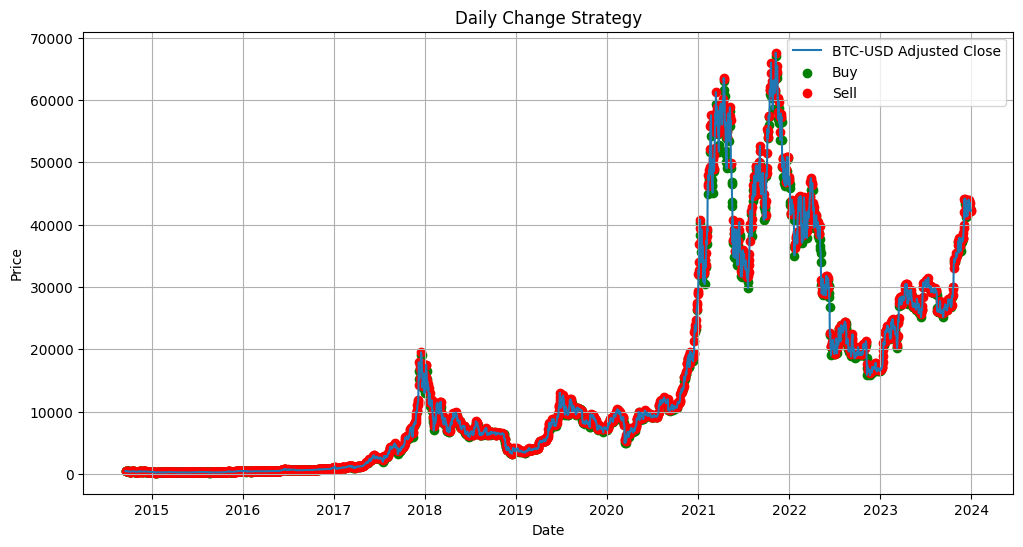

In [16]:
#4. Strategy: Daily Change
# Veri çekme
btc_data = yf.download('BTC-USD', start='2009-01-01', end='2024-01-01')

# Başlangıç portföy değeri ve komisyon
initial_investment = 10000
commission = 1  # Her işlem için komisyon

# Günlük değişim hesaplama
btc_data['Daily Change'] = btc_data['Adj Close'].diff()
btc_data['Buy'] = btc_data['Daily Change'] < 0
btc_data['Sell'] = btc_data['Daily Change'] > 0

# Portföy değeri, işlem kar/zarar listesi
portfolio_value_no_commission = initial_investment
portfolio_value_with_commission = initial_investment
profits_no_commission = []
profits_with_commission = []
buy_dates, sell_dates = [], []

for index, row in btc_data.iterrows():
    if row['Buy']:
        buy_dates.append(index)
        if portfolio_value_no_commission > 0:
            btc_bought_no_commission = portfolio_value_no_commission / row['Adj Close']
            btc_bought_with_commission = (portfolio_value_with_commission - commission) / row['Adj Close']
        else:
            btc_bought_no_commission = 0
            btc_bought_with_commission = 0

    if row['Sell'] and btc_bought_no_commission > 0:
        sell_dates.append(index)
        sell_value_no_commission = btc_bought_no_commission * row['Adj Close']
        sell_value_with_commission = btc_bought_with_commission * row['Adj Close'] - commission
        profit_no_commission = sell_value_no_commission - portfolio_value_no_commission
        profit_with_commission = sell_value_with_commission - portfolio_value_with_commission
        profits_no_commission.append(profit_no_commission)
        profits_with_commission.append(profit_with_commission)
        portfolio_value_no_commission = sell_value_no_commission
        portfolio_value_with_commission = sell_value_with_commission

# İstatistiklerin hesaplanması
trade_count = len(profits_no_commission)
average_trade_profit_no_commission = np.mean(profits_no_commission)
average_trade_profit_with_commission = np.mean(profits_with_commission)
max_profit_no_commission = np.max(profits_no_commission)
max_profit_with_commission = np.max(profits_with_commission)
min_profit_no_commission = np.min(profits_no_commission)
min_profit_with_commission = np.min(profits_with_commission)
final_portfolio_value_no_commission = portfolio_value_no_commission
final_portfolio_value_with_commission = portfolio_value_with_commission

# Sonuçların yazdırılması
print("Komisyonsuz Durum:")
print(f"Final Portfolio Value: ${final_portfolio_value_no_commission:.2f}")
print(f"Trade Count: {trade_count}")
print(f"Average Trade Profit: ${average_trade_profit_no_commission:.2f}")
print(f"Max Profit: ${max_profit_no_commission:.2f}")
print(f"Min Profit: ${min_profit_no_commission:.2f}")

print("\nKomisyonlu Durum:")
print(f"Final Portfolio Value: ${final_portfolio_value_with_commission:.2f}")
print(f"Trade Count: {trade_count}")
print(f"Average Trade Profit: ${average_trade_profit_with_commission:.2f}")
print(f"Max Profit: ${max_profit_with_commission:.2f}")
print(f"Min Profit: ${min_profit_with_commission:.2f}")

# Grafik çizimi
plt.figure(figsize=(12, 6))
plt.plot(btc_data['Adj Close'], label='BTC-USD Adjusted Close')
plt.scatter(buy_dates, btc_data.loc[buy_dates, 'Adj Close'], color='green', label='Buy')
plt.scatter(sell_dates, btc_data.loc[sell_dates, 'Adj Close'], color='red', label='Sell')
plt.title("Daily Change Strategy")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


Strateji 4: Günlük Değişime Dayalı Alım Satım
Bu strateji, Bitcoin'in günlük fiyat hareketlerinden yararlanarak düşüşlerde alım ve yükselişlerde satım yapar. Kripto para piyasalarının doğası gereği yüksek oynaklığa sahip olduğu için, bu strateji her gün küçük kazançlar elde etmeyi hedefleyebilir. Ancak, bu tür bir strateji aynı zamanda yüksek işlem maliyetlerine ve piyasa gürültüsüne karşı dikkatli olmayı gerektirir.

[*********************100%%**********************]  1 of 1 completed


Komisyonsuz Durum:
Yıllık Getiri: 60.90%
Ortalama İşlem Karı: $117081.25
Maksimum Kar: $622131.47
Minimum Kar: $-94094.92
Son Portföy Değeri: $829568.77

Komisyonlu Durum:
Yıllık Getiri: 60.90%
Ortalama İşlem Karı: $117035.93
Maksimum Kar: $621895.42
Minimum Kar: $-94062.40
Son Portföy Değeri: $829251.48


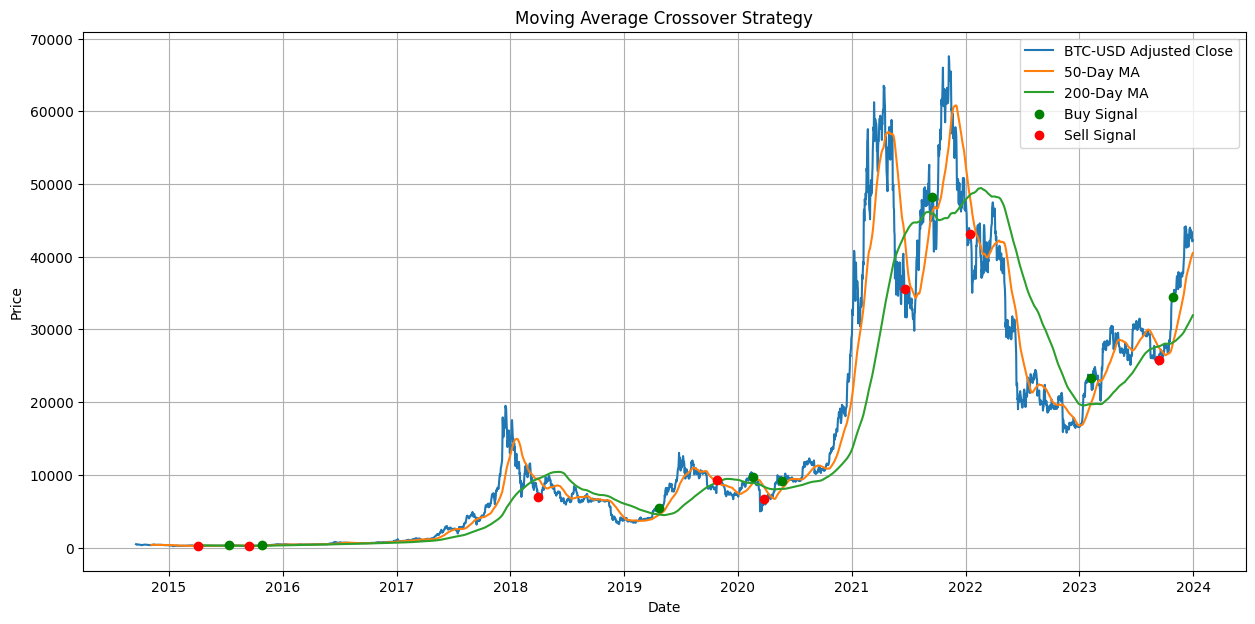

In [17]:
#5. Strategy: Moving Average Crossover

# Veri çekme
btc_data = yf.download('BTC-USD', start='2005-01-01', end='2024-01-01')

initial_investment = 10000
commission = 1  # Her işlem için komisyon

btc_data['50_MA'] = btc_data['Adj Close'].rolling(window=50).mean()
btc_data['200_MA'] = btc_data['Adj Close'].rolling(window=200).mean()

btc_data['Buy'] = btc_data['50_MA'] > btc_data['200_MA']
btc_data['Sell'] = btc_data['50_MA'] < btc_data['200_MA']

buy_signals = btc_data[btc_data['Buy'] & ~btc_data['Buy'].shift(1).fillna(False)]
sell_signals = btc_data[btc_data['Sell'] & ~btc_data['Sell'].shift(1).fillna(False)]

portfolio_values_no_commission = [initial_investment]
portfolio_values_with_commission = [initial_investment]
profits_no_commission = []
profits_with_commission = []
trade_count = 0

for buy_index, buy_row in buy_signals.iterrows():
    sell_after_buy = sell_signals[sell_signals.index > buy_index]
    if not sell_after_buy.empty:
        sell_row = sell_after_buy.iloc[0]
        buy_price = buy_row['Adj Close']
        sell_price = sell_row['Adj Close']

        # No commission calculation
        btc_bought = portfolio_values_no_commission[-1] / buy_price
        sell_value_no_commission = btc_bought * sell_price
        profits_no_commission.append(sell_value_no_commission - portfolio_values_no_commission[-1])
        portfolio_values_no_commission.append(sell_value_no_commission)

        # With commission calculation
        btc_bought = (portfolio_values_with_commission[-1] - commission) / buy_price
        sell_value_with_commission = btc_bought * sell_price - commission
        profits_with_commission.append(sell_value_with_commission - portfolio_values_with_commission[-1])
        portfolio_values_with_commission.append(sell_value_with_commission)

        trade_count += 1

# Calculating statistics
total_return_no_commission = portfolio_values_no_commission[-1] - initial_investment
total_return_with_commission = portfolio_values_with_commission[-1] - initial_investment
annualized_return_no_commission = ((portfolio_values_no_commission[-1] / initial_investment) ** (1 / (len(btc_data) / 365.25))) - 1
annualized_return_with_commission = ((portfolio_values_with_commission[-1] / initial_investment) ** (1 / (len(btc_data) / 365.25))) - 1
average_trade_profit_no_commission = np.mean(profits_no_commission)
average_trade_profit_with_commission = np.mean(profits_with_commission)
max_profit_no_commission = np.max(profits_no_commission)
max_profit_with_commission = np.max(profits_with_commission)
min_profit_no_commission = np.min(profits_no_commission)
min_profit_with_commission = np.min(profits_with_commission)

# Display results
print("Komisyonsuz Durum:")
print(f"Yıllık Getiri: {annualized_return_no_commission:.2%}")
print(f"Ortalama İşlem Karı: ${average_trade_profit_no_commission:.2f}")
print(f"Maksimum Kar: ${max_profit_no_commission:.2f}")
print(f"Minimum Kar: ${min_profit_no_commission:.2f}")
print(f"Son Portföy Değeri: ${portfolio_values_no_commission[-1]:.2f}")

print("\nKomisyonlu Durum:")
print(f"Yıllık Getiri: {annualized_return_with_commission:.2%}")
print(f"Ortalama İşlem Karı: ${average_trade_profit_with_commission:.2f}")
print(f"Maksimum Kar: ${max_profit_with_commission:.2f}")
print(f"Minimum Kar: ${min_profit_with_commission:.2f}")
print(f"Son Portföy Değeri: ${portfolio_values_with_commission[-1]:.2f}")

# Plot the graph
plt.figure(figsize=(15, 7))
plt.plot(btc_data['Adj Close'], label='BTC-USD Adjusted Close')
plt.plot(btc_data['50_MA'], label='50-Day MA')
plt.plot(btc_data['200_MA'], label='200-Day MA')

plt.scatter(buy_signals.index, buy_signals['Adj Close'], color='green', label='Buy Signal', zorder=2)
plt.scatter(sell_signals.index, sell_signals['Adj Close'], color='red', label='Sell Signal', zorder=2)

plt.title("Moving Average Crossover Strategy")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()



Strateji 5: Hareketli Ortalama Kesişimi (50/200 MA)
50 günlük kısa vadeli hareketli ortalama ile 200 günlük uzun vadeli hareketli ortalama arasındaki kesişim noktaları, bu stratejide alım veya satım sinyali olarak kullanılır. Eğer kısa vadeli ortalama uzun vadeli ortalamayı yukarı doğru kesiyorsa bu genellikle bir alım sinyali olarak değerlendirilirken, aşağı doğru kesmesi bir satım sinyali olarak yorumlanabilir. Bu strateji, piyasanın genel eğilimini belirlemek için teknik analizin temel araçlarından birini kullanır.

[*********************100%%**********************]  1 of 1 completed

Komisyonsuz Durum:
Yıllık Getiri: 58.84%
Ortalama İşlem Karı: $21326.96
Maksimum Kar: $999205.92
Minimum Kar: $-189399.94
Son Portföy Değeri: $735116.53
Komisyonlu Durum:
Yıllık Getiri: 58.81%
Ortalama İşlem Karı: $21288.69
Maksimum Kar: $997457.91
Minimum Kar: $-189069.54
Son Portföy Değeri: $733814.53


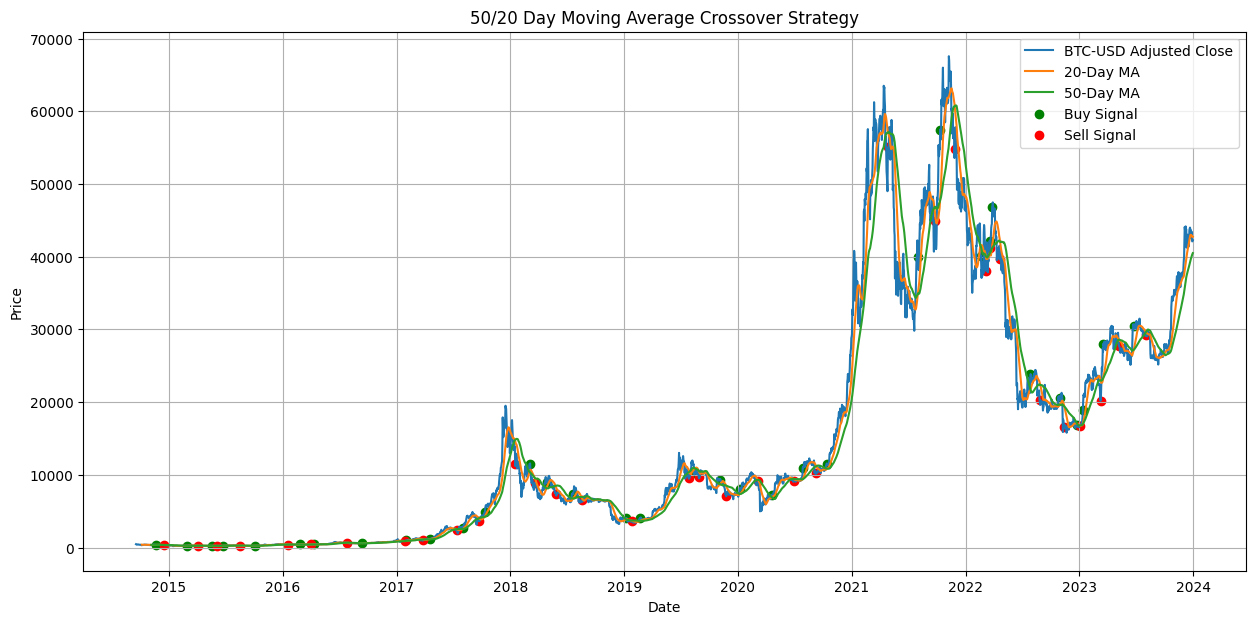

In [18]:
#6. Strategy: 50/20 Day Moving Average Crossover

# Veri çekme
btc_data = yf.download('BTC-USD', start='2005-01-01', end='2024-01-01')

# Hareketli Ortalama Kesişim Stratejisi
initial_investment = 10000
commission = 1  # Her işlem için komisyon

btc_data['20_MA'] = btc_data['Adj Close'].rolling(window=20).mean()
btc_data['50_MA'] = btc_data['Adj Close'].rolling(window=50).mean()

btc_data['Buy'] = btc_data['20_MA'] > btc_data['50_MA']
btc_data['Sell'] = btc_data['20_MA'] < btc_data['50_MA']

buy_signals = btc_data[btc_data['Buy'] & ~btc_data['Buy'].shift(1).fillna(False)]
sell_signals = btc_data[btc_data['Sell'] & ~btc_data['Sell'].shift(1).fillna(False)]

portfolio_value_no_commission = initial_investment
portfolio_value_with_commission = initial_investment - commission
profits_no_commission = []
profits_with_commission = []
buy_dates, sell_dates = [], []

for buy_index, buy_row in buy_signals.iterrows():
    sell_after_buy = sell_signals[sell_signals.index > buy_index]
    if not sell_after_buy.empty:
        sell_row = sell_after_buy.iloc[0]
        buy_dates.append(buy_index)
        sell_dates.append(sell_row.name)

        # No commission
        btc_bought = portfolio_value_no_commission / buy_row['Adj Close']
        sell_value_no_commission = btc_bought * sell_row['Adj Close']
        profit_no_commission = sell_value_no_commission - portfolio_value_no_commission
        profits_no_commission.append(profit_no_commission)
        portfolio_value_no_commission = sell_value_no_commission

        # With commission
        btc_bought = (portfolio_value_with_commission - commission) / buy_row['Adj Close']
        sell_value_with_commission = btc_bought * sell_row['Adj Close'] - commission
        profit_with_commission = sell_value_with_commission - portfolio_value_with_commission
        profits_with_commission.append(profit_with_commission)
        portfolio_value_with_commission = sell_value_with_commission

# Statistics
total_return_no_commission = portfolio_value_no_commission - initial_investment
total_return_with_commission = portfolio_value_with_commission - initial_investment
annualized_return_no_commission = np.power(portfolio_value_no_commission / initial_investment, 1 / ((btc_data.index[-1] - btc_data.index[0]).days / 365.25)) - 1
annualized_return_with_commission = np.power(portfolio_value_with_commission / initial_investment, 1 / ((btc_data.index[-1] - btc_data.index[0]).days / 365.25)) - 1

trade_count = len(profits_no_commission)
average_trade_profit_no_commission = np.mean(profits_no_commission) if profits_no_commission else 0
average_trade_profit_with_commission = np.mean(profits_with_commission) if profits_with_commission else 0
max_profit_no_commission = np.max(profits_no_commission) if profits_no_commission else 0
max_profit_with_commission = np.max(profits_with_commission) if profits_with_commission else 0
min_profit_no_commission = np.min(profits_no_commission) if profits_no_commission else 0
min_profit_with_commission = np.min(profits_with_commission) if profits_with_commission else 0

# Display results
print("Komisyonsuz Durum:")
print(f"Yıllık Getiri: {annualized_return_no_commission:.2%}")
print(f"Ortalama İşlem Karı: ${average_trade_profit_no_commission:.2f}")
print(f"Maksimum Kar: ${max_profit_no_commission:.2f}")
print(f"Minimum Kar: ${min_profit_no_commission:.2f}")
print(f"Son Portföy Değeri: ${portfolio_value_no_commission:.2f}")

print("Komisyonlu Durum:")
print(f"Yıllık Getiri: {annualized_return_with_commission:.2%}")
print(f"Ortalama İşlem Karı: ${average_trade_profit_with_commission:.2f}")
print(f"Maksimum Kar: ${max_profit_with_commission:.2f}")
print(f"Minimum Kar: ${min_profit_with_commission:.2f}")
print(f"Son Portföy Değeri: ${portfolio_value_with_commission:.2f}")

# 50/20 Gün Hareketli Ortalama Kesişim Stratejisi Grafiği
plt.figure(figsize=(15, 7))
plt.plot(btc_data['Adj Close'], label='BTC-USD Adjusted Close')
plt.plot(btc_data['20_MA'], label='20-Day MA')
plt.plot(btc_data['50_MA'], label='50-Day MA')
plt.scatter(buy_dates, btc_data.loc[buy_dates, 'Adj Close'], color='green', label='Buy Signal')
plt.scatter(sell_dates, btc_data.loc[sell_dates, 'Adj Close'], color='red', label='Sell Signal')
plt.title("50/20 Day Moving Average Crossover Strategy")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()



Strateji 6: Hareketli Ortalama Kesişimi (20/50 MA)
20 ve 50 günlük hareketli ortalamaların kesişimi, bu stratejide daha kısa vadeli piyasa eğilimlerini belirlemek için kullanılır. Kısa vadeli ortalama, uzun vadeli ortalamayı kestiğinde alım ve satım sinyalleri üretilir. Bu, yatırımcılara piyasa hareketlerine daha hızlı tepki verme şansı verir, ancak yanlış sinyaller ve sık işlem maliyetleri riskini de taşır.

[*********************100%%**********************]  1 of 1 completed


Komisyonsuz Durum:
Final Portfolio Value: $347726807.51
Annualized Return: 208.32%
Total Profit: $34395780014.41
Average Profit: $49704884.41
Max Profit: $356951721.85
Min Profit: $241.58

Komisyonlu Durum:
Final Portfolio Value: $347328212.69
Annualized Return: 208.28%
Total Profit: $34356349594.11
Average Profit: $49647904.04
Max Profit: $356542542.19
Min Profit: $237.34


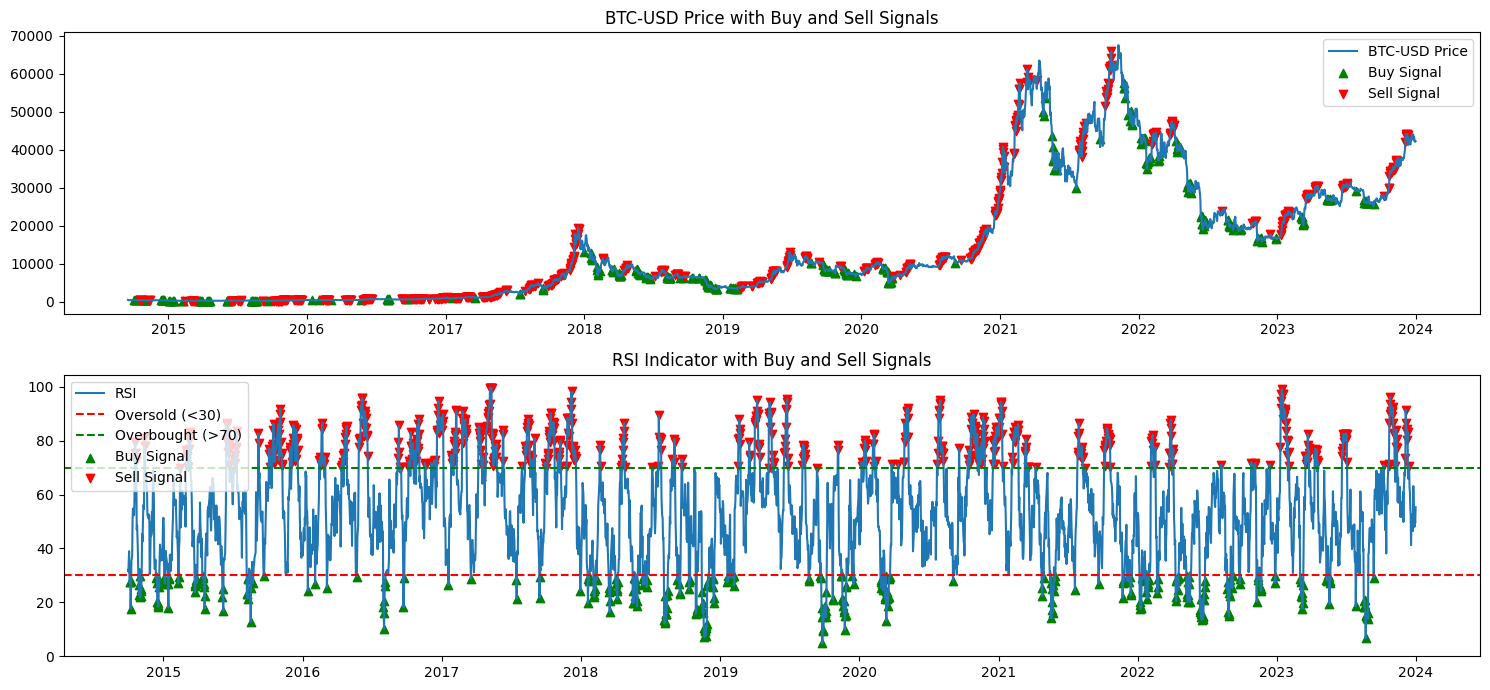

In [19]:
#7. Strategy: Relative Strength Index (RSI)
# Veri çekme
btc_data = yf.download('BTC-USD', start='2005-01-01', end='2024-01-01')

# RSI hesaplama
def calculate_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0).rolling(window=period).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

btc_data['RSI'] = calculate_rsi(btc_data['Adj Close'])

# Alım ve satım sinyalleri
btc_data['Buy'] = btc_data['RSI'] < 30
btc_data['Sell'] = btc_data['RSI'] > 70

# Başlangıç değerleri
initial_investment = 10000
commission = 1

# Portföy takibi
portfolio_value_commission = initial_investment
portfolio_value_no_commission = initial_investment
profits_no_commission = []
profits_commission = []
buy_dates, sell_dates = [], []

# İşlem gerçekleştirme
for date, row in btc_data.iterrows():
    if row['Buy']:
        buy_dates.append(date)
        if portfolio_value_no_commission > 0:
            btc_held_no_commission = portfolio_value_no_commission / row['Adj Close']
            portfolio_value_no_commission = 0

        if portfolio_value_commission > commission:
            btc_held_commission = (portfolio_value_commission - commission) / row['Adj Close']
            portfolio_value_commission = 0

    elif row['Sell'] and 'btc_held_no_commission' in locals():
        sell_dates.append(date)
        if btc_held_no_commission > 0:
            sell_value_no_commission = btc_held_no_commission * row['Adj Close']
            profit_no_commission = sell_value_no_commission - initial_investment
            profits_no_commission.append(profit_no_commission)
            portfolio_value_no_commission = sell_value_no_commission

        if 'btc_held_commission' in locals() and btc_held_commission > 0:
            sell_value_commission = btc_held_commission * row['Adj Close']
            profit_commission = sell_value_commission - initial_investment
            profits_commission.append(profit_commission)
            portfolio_value_commission = sell_value_commission - commission

# İstatistikler
investment_duration_years = (btc_data.index[-1] - btc_data.index[0]).days / 365.25
annualized_return_no_commission = (portfolio_value_no_commission / initial_investment) ** (1 / investment_duration_years) - 1
annualized_return_commission = ((portfolio_value_commission - commission) / initial_investment) ** (1 / investment_duration_years) - 1

print("Komisyonsuz Durum:")
print(f"Final Portfolio Value: ${portfolio_value_no_commission:.2f}")
print(f"Annualized Return: {annualized_return_no_commission:.2%}")
print(f"Total Profit: ${sum(profits_no_commission):.2f}")
print(f"Average Profit: ${np.mean(profits_no_commission):.2f}")
print(f"Max Profit: ${np.max(profits_no_commission):.2f}")
print(f"Min Profit: ${np.min(profits_no_commission):.2f}")

print("\nKomisyonlu Durum:")
print(f"Final Portfolio Value: ${portfolio_value_commission:.2f}")
print(f"Annualized Return: {annualized_return_commission:.2%}")
print(f"Total Profit: ${sum(profits_commission):.2f}")
print(f"Average Profit: ${np.mean(profits_commission):.2f}")
print(f"Max Profit: ${np.max(profits_commission):.2f}")
print(f"Min Profit: ${np.min(profits_commission):.2f}")

# Grafik çizimi
plt.figure(figsize=(15, 7))

# BTC fiyat grafiği
plt.subplot(2, 1, 1)
plt.plot(btc_data['Adj Close'], label='BTC-USD Price')
plt.scatter(buy_dates, btc_data.loc[buy_dates, 'Adj Close'], marker='^', color='green', label='Buy Signal')
plt.scatter(sell_dates, btc_data.loc[sell_dates, 'Adj Close'], marker='v', color='red', label='Sell Signal')
plt.title("BTC-USD Price with Buy and Sell Signals")
plt.legend()

# RSI grafiği
plt.subplot(2, 1, 2)
plt.plot(btc_data['RSI'], label='RSI')
plt.axhline(30, linestyle='--', color='red', label='Oversold (<30)')
plt.axhline(70, linestyle='--', color='green', label='Overbought (>70)')
plt.scatter(buy_dates, btc_data.loc[buy_dates, 'RSI'], marker='^', color='green', label='Buy Signal')
plt.scatter(sell_dates, btc_data.loc[sell_dates, 'RSI'], marker='v', color='red', label='Sell Signal')
plt.title("RSI Indicator with Buy and Sell Signals")
plt.legend()

plt.tight_layout()
plt.show()


Strateji 7: Göreceli Güç Endeksi (RSI)
RSI, aşırı alım ve aşırı satım piyasa koşullarını belirlemek için kullanılır. Değer 30'un altına düştüğünde Bitcoin'in aşırı satılmış olduğu ve potansiyel bir alım fırsatı olduğu varsayılır; 70'in üzerine çıktığında ise aşırı alınmış ve satış için uygun bir zaman olduğu düşünülür. Bu, piyasa duyarlılığı ve yatırımcı psikolojisi üzerine kurulu bir momentum stratejisidir.

[*********************100%%**********************]  1 of 1 completed


Initial investment: $10000
Final portfolio value (with commission): $18905.00
Annualized return (with commission): 65.98%
Final portfolio value (without commission): $1105457.90
Annualized return (without commission): 65.98%


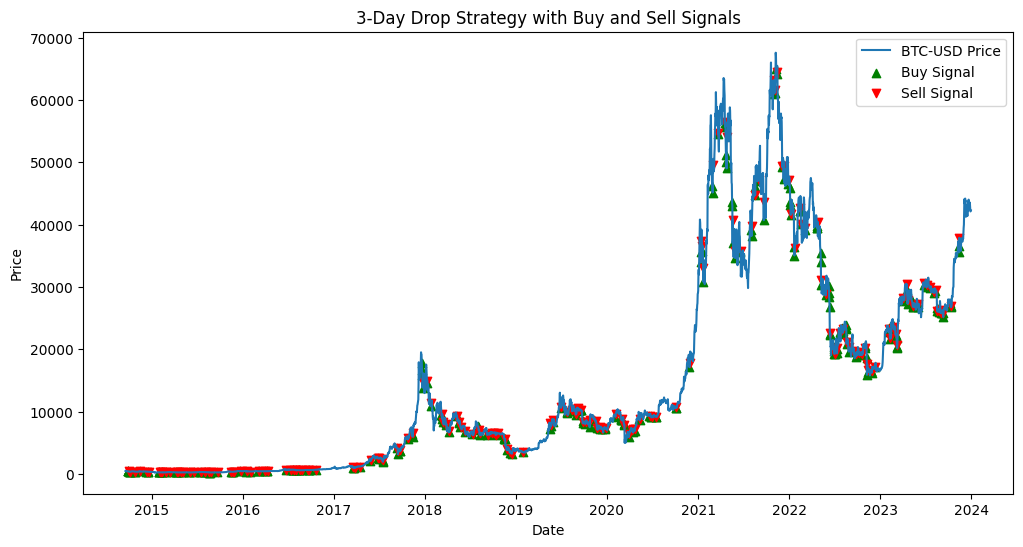

In [20]:
#8. Strategy: 3-Day Drop
# Veri çekme
btc_data = yf.download('BTC-USD', start='2005-01-01', end='2024-01-01')
btc_data['Daily Change'] = btc_data['Adj Close'].diff()

# 3 gün üst üste düşüşü tespit etme
btc_data['Loss Streak'] = btc_data['Daily Change'].rolling(window=3).apply(lambda x: x.lt(0).all())

# Alım ve satım koşulları
btc_data['Buy'] = btc_data['Loss Streak']
btc_data['Sell'] = (btc_data['Daily Change'] > 0) & btc_data['Loss Streak'].shift(1)

initial_investment = 10000
commission = 1
portfolio_value = initial_investment
btc_held = 0

# Komisyonlu ve komisyonsuz işlemler için kar/zarar listeleri
profits_commission = []
profits_no_commission = []

for date, row in btc_data.iterrows():
    if row['Buy']:
        if portfolio_value > commission:
            btc_held = (portfolio_value - commission) / row['Adj Close']
            portfolio_value = 0  # Alım yapıldıktan sonra bakiye 0
            profits_no_commission.append(-commission)  # Komisyon zararı
    elif row['Sell'] and btc_held > 0:
        sell_value = btc_held * row['Adj Close']
        profit = sell_value - initial_investment
        portfolio_value = sell_value - commission  # Satım yapıldıktan sonra bakiye güncellenir
        btc_held = 0
        profits_commission.append(profit - commission)  # Net kar hesaplanır
        profits_no_commission.append(profit)

# İstatistikler
investment_duration_years = (btc_data.index[-1] - btc_data.index[0]).days / 365.25
annualized_return_commission = ((sum(profits_commission) + initial_investment) / initial_investment) ** (1 / investment_duration_years) - 1
annualized_return_no_commission = ((sum(profits_no_commission) + initial_investment) / initial_investment) ** (1 / investment_duration_years) - 1

# Sonuçların Yazdırılması
print(f"Initial investment: ${initial_investment}")
print(f"Final portfolio value (with commission): ${portfolio_value:.2f}")
print(f"Annualized return (with commission): {annualized_return_commission:.2%}")
print(f"Final portfolio value (without commission): ${sum(profits_no_commission) + initial_investment:.2f}")
print(f"Annualized return (without commission): {annualized_return_no_commission:.2%}")

# Grafik çizimi
plt.figure(figsize=(12, 6))
plt.plot(btc_data['Adj Close'], label='BTC-USD Price')

# Alım ve satım sinyallerini bulmak için doğru satırları seç
buy_signals = btc_data[btc_data['Buy'] == 1]
sell_signals = btc_data[btc_data['Sell'] == 1]

plt.scatter(buy_signals.index, buy_signals['Adj Close'], color='green', label='Buy Signal', marker='^')
plt.scatter(sell_signals.index, sell_signals['Adj Close'], color='red', label='Sell Signal', marker='v')

plt.title("3-Day Drop Strategy with Buy and Sell Signals")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()



Strateji 8: Üç Gün Düşüş Sonrası Alım
Bu strateji, üç ardışık düşüş gününün ardından bir toparlanma olasılığına dayanarak alım yapar. Kısa vadeli düşüşleri alım fırsatı olarak değerlendiren bu yaklaşım, piyasanın aşırı tepki verdiğini ve düzelme yapacağını varsayar.

Without Commission:
Total return: 4114.98%
Annualized return: 49.59%
Trade count: 1122
Average trade profit: 3.67%
Max profit: 57.45%
Min profit: -43.83%

With Commission:
Total return: 3935.93%
Annualized return: 48.89%
Average trade profit: 3.51%
Final capital after trades: $-84237.07


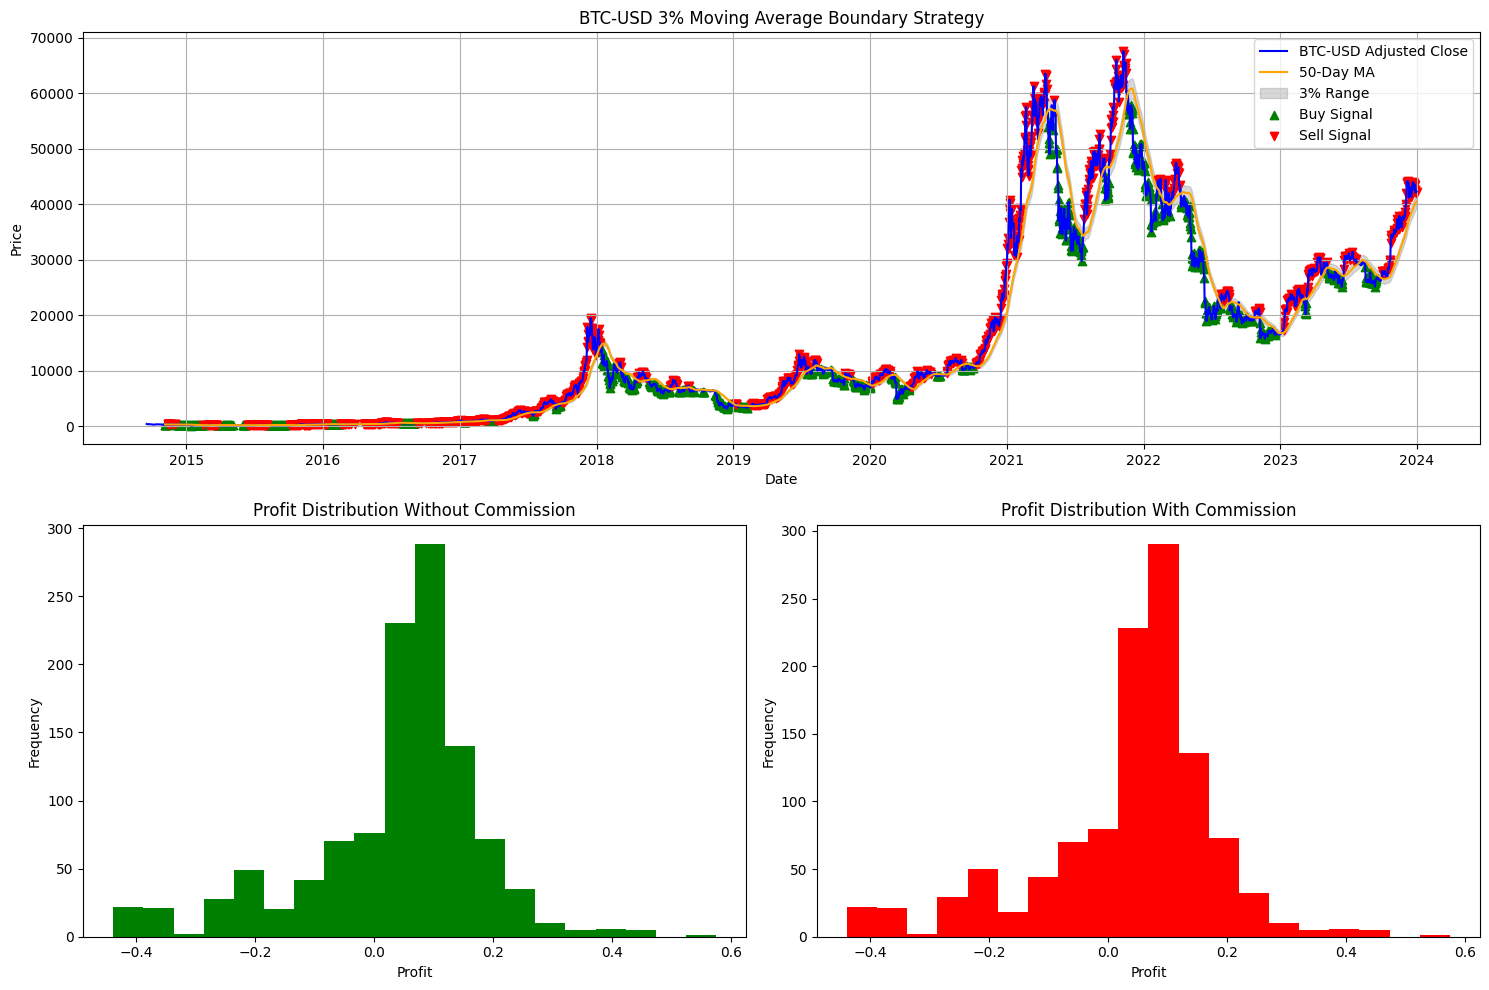

In [21]:
#9. Strategy: 3% Moving Average Boundary

# Hareketli ortalama ve sınırların hesaplanması
btc_data['50_MA'] = btc_data['Adj Close'].rolling(window=50).mean()
btc_data['Lower Bound'] = btc_data['50_MA'] * 0.97
btc_data['Upper Bound'] = btc_data['50_MA'] * 1.03

# Alım satım sinyallerinin belirlenmesi
btc_data['Buy'] = btc_data['Adj Close'] < btc_data['Lower Bound']
btc_data['Sell'] = btc_data['Adj Close'] > btc_data['Upper Bound']

# Alım ve satım işlemlerini gerçekleştirme
buy_signals = btc_data[btc_data['Buy']]
sell_signals = btc_data[btc_data['Sell']]

# Komisyonlu ve Komisyonsuz Kar/Zarar hesaplama
profits_ma_bounds = []
profits_ma_bounds_commission = []
capital = 10000  # Başlangıç kapitali
commission = 1  # Komisyon ücreti

for buy_index, buy_row in buy_signals.iterrows():
    sell_after_buy = sell_signals[sell_signals.index > buy_index]
    if not sell_after_buy.empty:
        sell_price = sell_after_buy.iloc[0]['Adj Close']
        buy_price = buy_row['Adj Close']
        profit = (sell_price - buy_price) / buy_price
        profit_commission = ((sell_price - commission) - (buy_price + commission)) / (buy_price + commission)
        profits_ma_bounds.append(profit)
        profits_ma_bounds_commission.append(profit_commission)
        capital += sell_price - buy_price - (2 * commission)  # Her alım-satım işlemi için 2 kez komisyon düşülür

total_return_ma_bounds = sum(profits_ma_bounds)
total_return_ma_bounds_commission = sum(profits_ma_bounds_commission)
annualized_return_ma_bounds = ((1 + total_return_ma_bounds) ** (365.25 / len(btc_data))) - 1
annualized_return_ma_bounds_commission = ((1 + total_return_ma_bounds_commission) ** (365.25 / len(btc_data))) - 1

# İstatistikler
trade_count_ma_bounds = len(profits_ma_bounds)
average_trade_profit_ma_bounds = np.mean(profits_ma_bounds) if profits_ma_bounds else 0
average_trade_profit_ma_bounds_commission = np.mean(profits_ma_bounds_commission) if profits_ma_bounds_commission else 0
max_profit_ma_bounds = max(profits_ma_bounds) if profits_ma_bounds else 0
min_profit_ma_bounds = min(profits_ma_bounds) if profits_ma_bounds else 0

# Sonuçların Yazdırılması
print("Without Commission:")
print(f"Total return: {total_return_ma_bounds:.2%}")
print(f"Annualized return: {annualized_return_ma_bounds:.2%}")
print(f"Trade count: {trade_count_ma_bounds}")
print(f"Average trade profit: {average_trade_profit_ma_bounds:.2%}")
print(f"Max profit: {max_profit_ma_bounds:.2%}")
print(f"Min profit: {min_profit_ma_bounds:.2%}")
print("\nWith Commission:")
print(f"Total return: {total_return_ma_bounds_commission:.2%}")
print(f"Annualized return: {annualized_return_ma_bounds_commission:.2%}")
print(f"Average trade profit: {average_trade_profit_ma_bounds_commission:.2%}")
print(f"Final capital after trades: ${capital:.2f}")

# %3 Hareketli Ortalama Sınır Stratejisi Grafiği (Komisyonsuz ve Komisyonlu)
plt.figure(figsize=(15, 10))

# BTC Fiyatı ve Hareketli Ortalama
plt.subplot(2, 1, 1)
plt.plot(btc_data['Adj Close'], label='BTC-USD Adjusted Close', color='blue')
plt.plot(btc_data['50_MA'], label='50-Day MA', color='orange')
plt.fill_between(btc_data.index, btc_data['Lower Bound'], btc_data['Upper Bound'], color='gray', alpha=0.3, label='3% Range')
plt.scatter(buy_signals.index, buy_signals['Adj Close'], color='green', marker='^', label='Buy Signal')
plt.scatter(sell_signals.index, sell_signals['Adj Close'], color='red', marker='v', label='Sell Signal')
plt.title("BTC-USD 3% Moving Average Boundary Strategy")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)

# Kar/Zarar Grafiği (Komisyonsuz)
plt.subplot(2, 2, 3)
plt.hist(profits_ma_bounds, bins=20, color='green')
plt.title("Profit Distribution Without Commission")
plt.xlabel("Profit")
plt.ylabel("Frequency")

# Kar/Zarar Grafiği (Komisyonlu)
plt.subplot(2, 2, 4)
plt.hist(profits_ma_bounds_commission, bins=20, color='red')
plt.title("Profit Distribution With Commission")
plt.xlabel("Profit")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

Strateji 9: Hareketli Ortalama Sınırları İçinde Alım Satım
Hisse senedi 50 günlük hareketli ortalamanın %3 altına indikten sonraki yükseldiği ilk günde al, %3 üstüne çıktıktan sonraki düştüğü ilk günde sat.
Bu strateji, hisse senedinin 50 günlük hareketli ortalamasının %3 altına düşmesi ve sonrasında artış göstermesi durumunda alım, %3 üstüne çıkmasından sonra düşüş göstermesi durumunda ise satış yapılmasını içerir.
50 günlük hareketli ortalamanın belirli bir yüzde toleransı içinde alım ve satım yaparak, fiyatın bu ortalamaya geri döneceği varsayımı üzerine kuruludur. Örneğin, fiyat hareketli ortalamanın %3 altına düştüğünde alım yapılırken, %3 üstüne çıktığında satım yapılır.

[*********************100%%**********************]  1 of 1 completed


Without Commission:
Total return: 1662.14%
Annualized return: 36.19%
Trade count: 1322
Average trade profit: 1.26%
Max profit: 28.85%
Min profit: -27.50%

With Commission:
Total return: 1459.40%
Annualized return: 34.41%
Final capital after trades: $510955.67
Trade count: 1322
Average trade profit: 1.10%
Max profit: 28.78%
Min profit: -27.51%


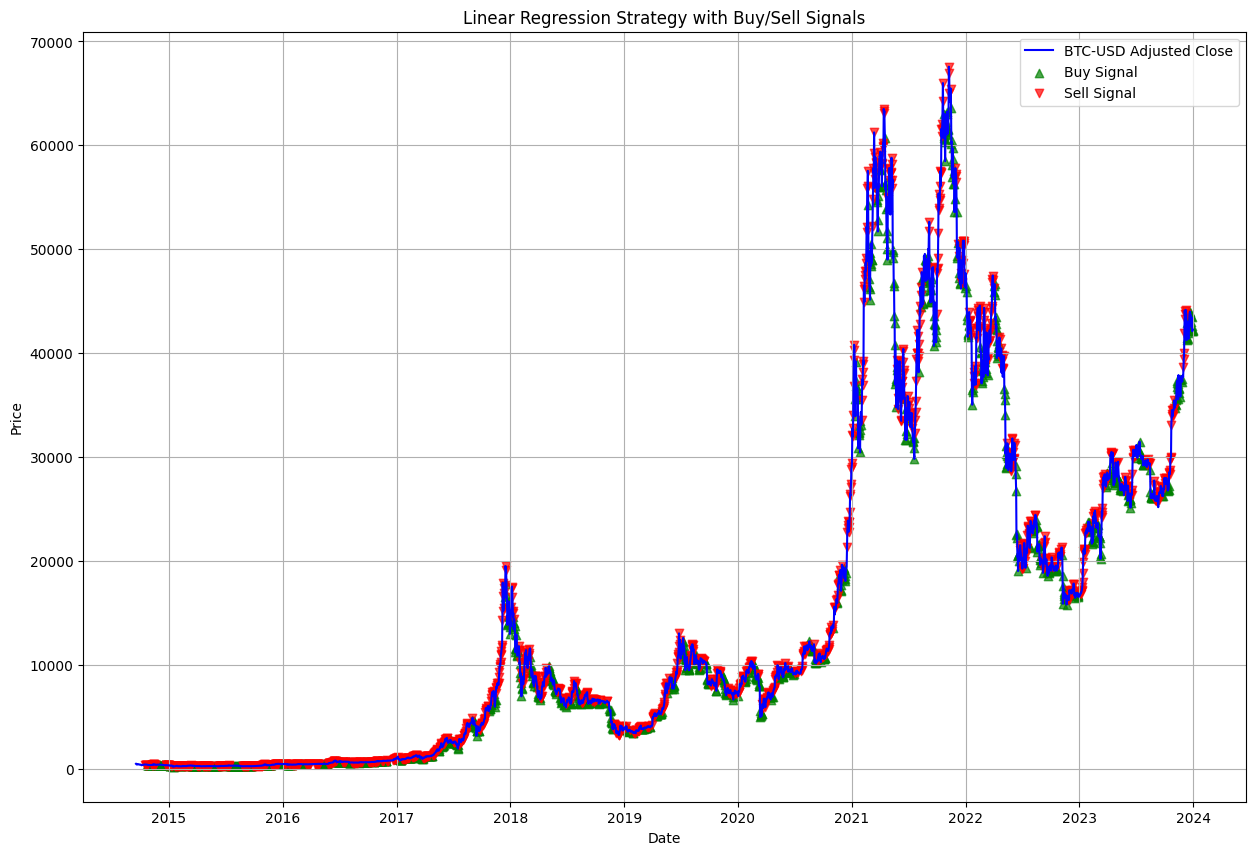

In [22]:
#10. Strategy: Linear Regression
# Bitcoin verilerini çekme
btc_data = yf.download('BTC-USD', start='2009-01-01', end='2024-01-01')

# 10. strateji: Lineer Regresyon Stratejisi
def linear_regression_signal(data, window=30, threshold=0.01):
    signals = {'Buy': [], 'Sell': []}
    for i in range(window, len(data)):
        x = np.arange(window).reshape(-1, 1)
        y = data['Adj Close'].iloc[i-window:i]
        model = LinearRegression().fit(x, y)
        predicted = model.predict(np.array([[window]]))[0]
        actual = data['Adj Close'].iloc[i]
        if actual < predicted * (1 - threshold):
            signals['Buy'].append(data.index[i])
        elif actual > predicted * (1 + threshold):
            signals['Sell'].append(data.index[i])
    return signals

signals = linear_regression_signal(btc_data)

buy_prices = btc_data.loc[signals['Buy']]['Adj Close']
sell_prices = btc_data.loc[signals['Sell']]['Adj Close']

# Komisyon uygulayarak ve uygulamadan kar/zarar hesaplama
commission = 1  # Komisyon ücreti
capital = 10000  # Başlangıç kapitali

profits_linear_regression = []
profits_linear_regression_commission = []

for buy_index in signals['Buy']:
    for sell_index in signals['Sell']:
        if sell_index > buy_index:
            buy_price = btc_data.loc[buy_index]['Adj Close']
            sell_price = btc_data.loc[sell_index]['Adj Close']
            profit = (sell_price - buy_price) / buy_price
            profit_commission = ((sell_price - commission) - (buy_price + commission)) / (buy_price + commission)
            profits_linear_regression.append(profit)
            profits_linear_regression_commission.append(profit_commission)
            capital += sell_price - buy_price - (2 * commission)  # Komisyon iki kez düşülür
            break  # Eşleşen ilk satışı bulduktan sonra döngüden çık

total_return_linear_regression = sum(profits_linear_regression)
total_return_linear_regression_commission = sum(profits_linear_regression_commission)
annualized_return_linear_regression = ((1 + total_return_linear_regression) ** (365.25 / len(btc_data))) - 1
annualized_return_linear_regression_commission = ((1 + total_return_linear_regression_commission) ** (365.25 / len(btc_data))) - 1

# İstatistikler
trade_count_linear_regression = len(profits_linear_regression)
average_trade_profit_linear_regression = np.mean(profits_linear_regression) if profits_linear_regression else 0
average_trade_profit_linear_regression_commission = np.mean(profits_linear_regression_commission) if profits_linear_regression_commission else 0
max_profit_linear_regression = max(profits_linear_regression) if profits_linear_regression else 0
min_profit_linear_regression = min(profits_linear_regression) if profits_linear_regression else 0

print("Without Commission:")
print(f"Total return: {total_return_linear_regression:.2%}")
print(f"Annualized return: {annualized_return_linear_regression:.2%}")
print(f"Trade count: {trade_count_linear_regression}")
print(f"Average trade profit: {average_trade_profit_linear_regression:.2%}")
print(f"Max profit: {max_profit_linear_regression:.2%}")
print(f"Min profit: {min_profit_linear_regression:.2%}")

print("\nWith Commission:")
print(f"Total return: {total_return_linear_regression_commission:.2%}")
print(f"Annualized return: {annualized_return_linear_regression_commission:.2%}")
print(f"Final capital after trades: ${capital:.2f}")
print(f"Trade count: {trade_count_linear_regression}")
print(f"Average trade profit: {average_trade_profit_linear_regression_commission:.2%}")
print(f"Max profit: {max(profits_linear_regression_commission):.2%}" if profits_linear_regression_commission else "Max profit: N/A")
print(f"Min profit: {min(profits_linear_regression_commission):.2%}" if profits_linear_regression_commission else "Min profit: N/A")

# Lineer Regresyon Stratejisi Grafiği (Görselleştirme)
plt.figure(figsize=(15, 10))

# BTC-USD Ayarlanmış Kapanış Fiyatları
plt.plot(btc_data['Adj Close'], label='BTC-USD Adjusted Close', color='blue')

# Alım Sinyalleri
plt.scatter(buy_prices.index, buy_prices, color='green', marker='^', label='Buy Signal', alpha=0.7)

# Satım Sinyalleri
plt.scatter(sell_prices.index, sell_prices, color='red', marker='v', label='Sell Signal', alpha=0.7)

plt.title("Linear Regression Strategy with Buy/Sell Signals")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

Strateji 10: Lineer Regresyon Sinyalleri
Lineer regresyon modeli kullanılarak fiyat tahminleri yapılır ve belirlenen bir eşik değer aşılırsa alım veya satım yapılır. Bu strateji, fiyatların zaman içinde izlediği genel eğilime dayanarak olası fiyat hareketlerini önceden belirlemeye çalışır.
Son 30 gün için lineer regresyon çizgisi oluşturur. Eğer hisse senedi bu çizginin %1 altına düşerse satın al, %1 üzerine çıkarsa sat.
Bu strateji, son 30 günlük verilere dayalı lineer regresyon çizgisi kullanır. Fiyat, bu çizginin %1 altına düştüğünde alım, %1 üzerine çıktığında satım yapılır.

[*********************100%%**********************]  1 of 1 completed


Komisyonsuz - Final portfolio value: $7946.04
Komisyonsuz - Total profit: $-2053.96
Komisyonsuz - Annualized return: -2.45%
Komisyonsuz - Max profit: $21295.52
Komisyonsuz - Min profit: $-4786.08
Komisyonlu - Final portfolio value: $7893.21
Komisyonlu - Total profit: $-2106.79
Komisyonlu - Annualized return: -2.52%
Komisyonlu - Max profit: $21220.62
Komisyonlu - Min profit: $-4812.94


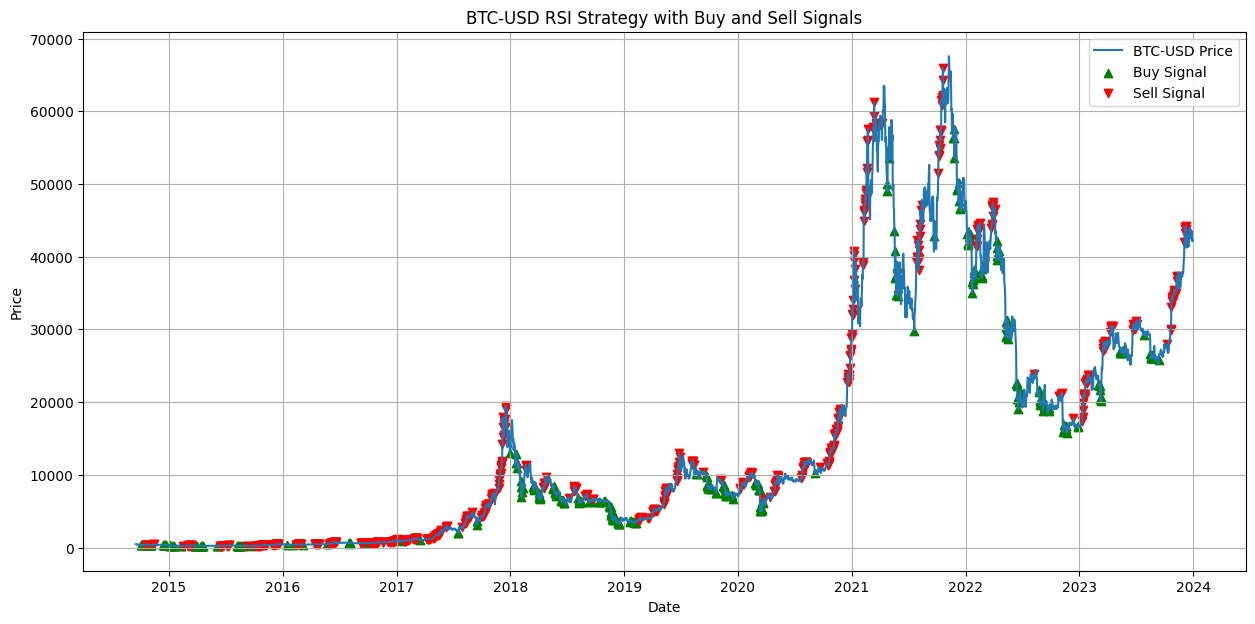

In [7]:
#11. Strategy: Relative Strength Index (RSI) with Buy and Sell Signals
# Veri çekme
btc_data = yf.download('BTC-USD', start='2009-01-01', end='2024-01-01')

initial_investment = 10000
commission = 1  # Komisyon ücreti

# RSI hesaplama fonksiyonu
def calculate_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0).rolling(window=period).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

btc_data['RSI'] = calculate_rsi(btc_data['Adj Close'])

# Alım ve satım sinyalleri
btc_data['Buy'] = btc_data['RSI'] < 30
btc_data['Sell'] = btc_data['RSI'] > 70

# Komisyonlu ve komisyonsuz işlemler için değişkenler
portfolio_value_no_commission = initial_investment
portfolio_value_commission = initial_investment
btc_held_no_commission = 0
btc_held_commission = 0
profits_no_commission = []
profits_commission = []

buy_dates = []
sell_dates = []

for date, row in btc_data.iterrows():
    if row['Buy']:
        if portfolio_value_no_commission > 0:
            btc_held_no_commission = portfolio_value_no_commission / row['Adj Close']
            portfolio_value_no_commission = 0

        if portfolio_value_commission > commission:
            btc_held_commission = (portfolio_value_commission - commission) / row['Adj Close']
            portfolio_value_commission = 0

        buy_dates.append(date)

    elif row['Sell']:
        if btc_held_no_commission > 0:
            portfolio_value_no_commission = btc_held_no_commission * row['Adj Close']
            btc_held_no_commission = 0
            profits_no_commission.append(portfolio_value_no_commission - initial_investment)

        if btc_held_commission > 0:
            portfolio_value_commission = btc_held_commission * row['Adj Close'] - commission
            btc_held_commission = 0
            profits_commission.append(portfolio_value_commission - initial_investment)

        sell_dates.append(date)

# İstatistiklerin hesaplanması ve yazdırılması
def print_stats(portfolio_value, initial_investment, profits, label):
    total_return = portfolio_value - initial_investment
    annualized_return = ((portfolio_value / initial_investment) ** (1 / ((btc_data.index[-1] - btc_data.index[0]).days / 365.25))) - 1
    print(f"{label} - Final portfolio value: ${portfolio_value:.2f}")
    print(f"{label} - Total profit: ${total_return:.2f}")
    print(f"{label} - Annualized return: {annualized_return:.2%}")
    print(f"{label} - Max profit: ${max(profits):.2f}" if profits else f"{label} - Max profit: $0")
    print(f"{label} - Min profit: ${min(profits):.2f}" if profits else f"{label} - Min profit: $0")

print_stats(portfolio_value_no_commission, initial_investment, profits_no_commission, "Komisyonsuz")
print_stats(portfolio_value_commission, initial_investment, profits_commission, "Komisyonlu")

# Grafik çizimi
plt.figure(figsize=(15, 7))
plt.plot(btc_data['Adj Close'], label='BTC-USD Price')
plt.scatter(buy_dates, btc_data.loc[buy_dates, 'Adj Close'], marker='^', color='g', label='Buy Signal')
plt.scatter(sell_dates, btc_data.loc[sell_dates, 'Adj Close'], marker='v', color='r', label='Sell Signal')
plt.title('BTC-USD RSI Strategy with Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


RSI göstergesini kullanarak alım ve satım sinyalleri üretir ve işlemleri gerçekleştirir. Ayrıca, işlemleri grafik üzerinde gösterir ve portföyün son değerini, toplam kar/zararı ve yıllık getiriyi hesaplar. Komisyon masraflarını her alım ve satım işlemi için hesaba katar.